# <center>Marketing Analytics Final Project</center>

## <center>Nike Marketing Analytics</center>

### Archit Navadiya - 0815897

#### IMPORT LIBRARIES AND LOADING DATASET

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#loading the dataset
df = pd.read_csv("nike_dataset.csv")
dfr = pd.read_csv("review_dataset.csv")

### EXPLORATORY DATA ANALYSIS

In [27]:
#shape of the dataframe
print("Shape of the dataframe",df.shape)

Shape of the dataframe (229471, 23)


In [28]:
#first 5 rows of the dataset\
print("First 5 rows of the dataset",df.head(5))

First 5 rows of the dataset   DEPARTMENT                   CATEGORY SUBCATEGORY       SKU  SKU_VARIANT  \
0       Kids  Accessories and Equipment        Hats  14024803     28003080   
1       Kids  Accessories and Equipment        Hats  12232054     21458460   
2       Kids  Accessories and Equipment        Hats  12231348     21453989   
3       Kids  Accessories and Equipment        Hats  13907994     27674553   
4       Kids  Accessories and Equipment        Hats  13907995     27674554   

      PRODUCT_NAME  PRODUCT_ID                 TITLE PRODUCT_TYPE  \
0  Nike Heritage86    12231348  Kids' Adjustable Hat      APPAREL   
1  Nike Heritage86    12231348  Kids' Adjustable Hat      APPAREL   
2  Nike Heritage86    12231348  Kids' Adjustable Hat      APPAREL   
3  Nike Heritage86    13907994  Kids' Adjustable Hat      APPAREL   
4  Nike Heritage86    13907994  Kids' Adjustable Hat      APPAREL   

                                         PRODUCT_URL  ...  \
0  https://www.nike.com/gb/

In [29]:
#datatypes of the dataset
print("Datatypes of the dataset",df.dtypes)

Datatypes of the dataset DEPARTMENT           object
CATEGORY             object
SUBCATEGORY          object
SKU                   int64
SKU_VARIANT           int64
PRODUCT_NAME         object
PRODUCT_ID            int64
TITLE                object
PRODUCT_TYPE         object
PRODUCT_URL          object
PRODUCT_SIZE         object
LABEL                object
IS_BESTSELLER          bool
COLOR                object
BRAND                object
AVAILABILITY         object
CURRENCY             object
PRICE_CURRENT       float64
PRICE_RETAIL        float64
RunDate              object
InsertUpdateTime     object
COLOR_CODE           object
TID                   int64
dtype: object


In [30]:
#summary of the dataset
print("Summary of the dataset",df.describe())

Summary of the dataset                 SKU   SKU_VARIANT    PRODUCT_ID  PRICE_CURRENT   PRICE_RETAIL  \
count  2.294710e+05  2.294710e+05  2.294710e+05  229471.000000  229471.000000   
mean   4.019402e+07  2.722394e+07  4.035067e+07      75.186240      79.763504   
std    1.599420e+08  1.618548e+06  1.603994e+08      53.751793      55.268200   
min    1.000072e+07  1.000702e+07  1.000072e+07       6.950000       6.950000   
25%    1.369380e+07  2.706616e+07  1.366746e+07      37.950000      39.950000   
50%    1.390334e+07  2.765702e+07  1.390414e+07      59.950000      64.950000   
75%    1.404521e+07  2.810834e+07  1.405392e+07     109.950000     109.950000   
max    1.010262e+09  2.935828e+07  1.010261e+09    1337.900000    2229.950000   

                 TID  
count  229471.000000  
mean   114736.000000  
std     66242.716148  
min         1.000000  
25%     57368.500000  
50%    114736.000000  
75%    172103.500000  
max    229471.000000  


In [31]:
#checking nulls
df.isnull().sum()

DEPARTMENT            0
CATEGORY              0
SUBCATEGORY           0
SKU                   0
SKU_VARIANT           0
PRODUCT_NAME          0
PRODUCT_ID            0
TITLE                 0
PRODUCT_TYPE          0
PRODUCT_URL           0
PRODUCT_SIZE          5
LABEL                 0
IS_BESTSELLER         0
COLOR                 0
BRAND               187
AVAILABILITY          0
CURRENCY              0
PRICE_CURRENT         0
PRICE_RETAIL          0
RunDate               0
InsertUpdateTime      0
COLOR_CODE            0
TID                   0
dtype: int64

In [32]:
#Generate histograms to understand the distribution of numerical variables
#df.hist(figsize=(10, 6))
#plt.tight_layout()
#plt.show()

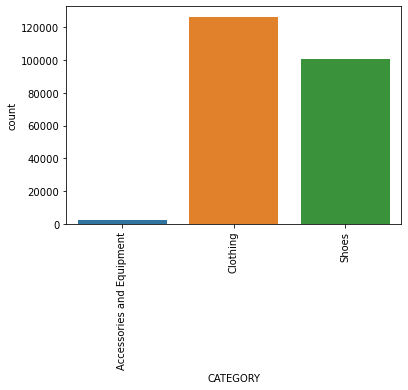

In [33]:
#Create bar plots to analyze categorical variables:
sns.countplot(x='CATEGORY', data=df)
plt.xticks(rotation=90)
plt.show()

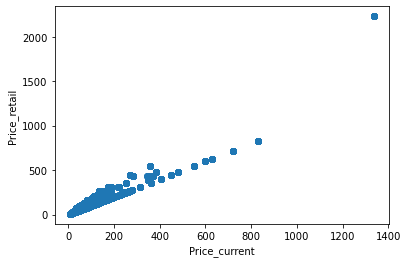

In [34]:
#Use scatter plots or line plots to visualize relationships between variables:
plt.scatter(df['PRICE_CURRENT'], df['PRICE_RETAIL'])
plt.xlabel('Price_current')
plt.ylabel('Price_retail')
plt.show()

# NIKE PRODUCT ANALYSIS 

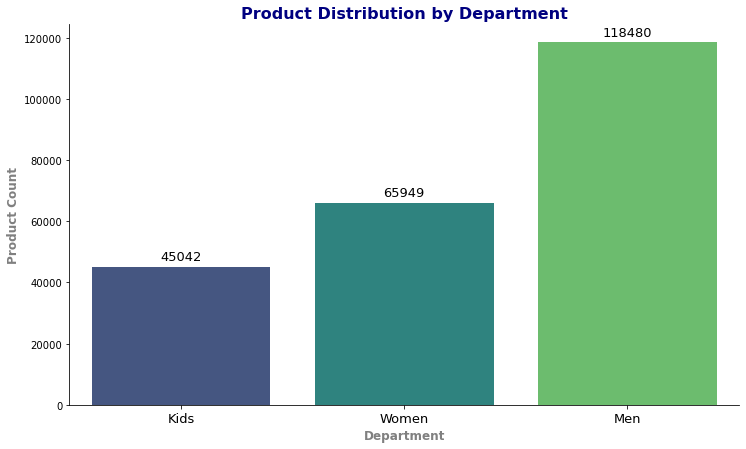

In [35]:
# Bar Chart for Department
# Define a custom color palette
colors = sns.color_palette("viridis", len(df['DEPARTMENT'].unique()))

# Bar Chart for Department with custom styling
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='DEPARTMENT', data=df, palette=colors)

plt.title('Product Distribution by Department', fontsize=16, fontweight='bold', color='navy')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13, color='black')

# Add labels and customize axes
plt.xlabel('Department', fontsize=12, fontweight='bold', color='gray')
plt.ylabel('Product Count', fontsize=12, fontweight='bold', color='gray')

plt.xticks(rotation=0, fontsize=13)

# Remove the top and right spines for aesthetics
sns.despine(top=True, right=True)

plt.show()

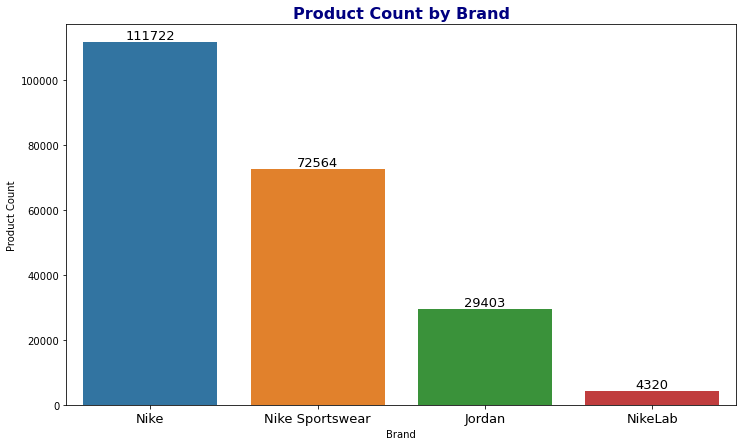

In [36]:
# Bar Chart for Product Count by Brand
brands_to_exclude = ['NIKEiD', 'Nike Pro', 'ACG']
filtered_df = df[~df['BRAND'].isin(brands_to_exclude)]

# Count the occurrences of each brand
brand_counts = filtered_df['BRAND'].value_counts()

# Sort the brands based on counts
sorted_brands = brand_counts.index

# Bar Chart for Product Count by Brand
plt.figure(figsize=(12, 7))
sns.countplot(x='BRAND', data=filtered_df, order=sorted_brands)
plt.title('Product Count by Brand', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Brand')
plt.ylabel('Product Count')

# Add labels to the bars
for i, count in enumerate(brand_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=13)

plt.xticks(rotation=0, fontsize=13)
plt.show()

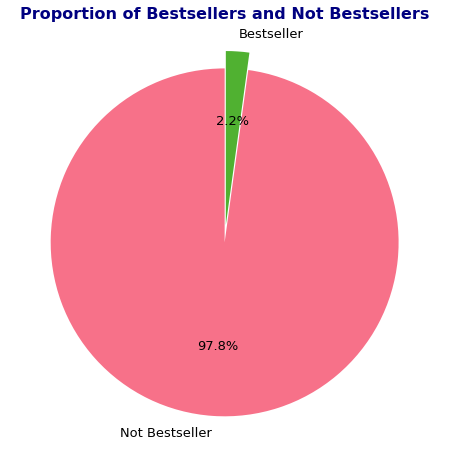

In [37]:
# Pie Chart for Bestsellers
df['IS_BESTSELLER'] = df['IS_BESTSELLER'].replace({True: 'Bestseller', False: 'Not Bestseller'})

# Use a different color palette
colors = sns.color_palette("husl", 3)

# Pie chart with explosion
plt.figure(figsize=(8, 8))
df['IS_BESTSELLER'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=colors, fontsize=13)
plt.title('Proportion of Bestsellers and Not Bestsellers', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('')  # Remove y-axis label for better clarity
plt.show()

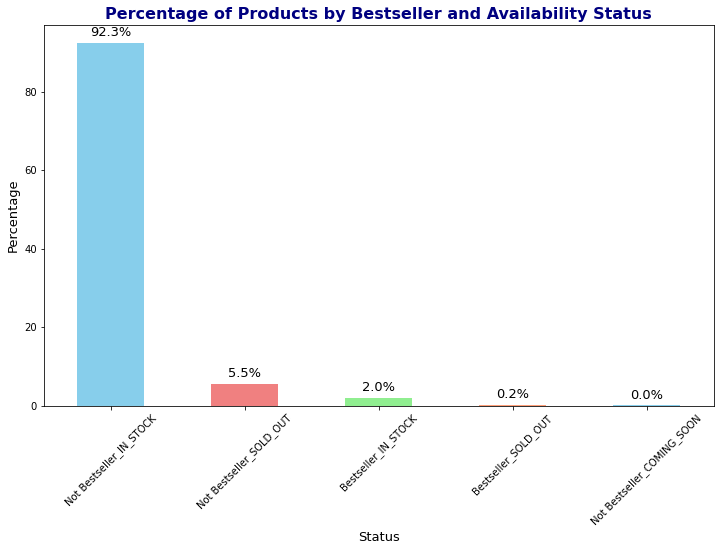

Percentage of Products by Bestseller and Availability Status:
Not Bestseller_IN_STOCK       92.309704
Not Bestseller_SOLD_OUT        5.476945
Bestseller_IN_STOCK            1.984129
Bestseller_SOLD_OUT            0.182158
Not Bestseller_COMING_SOON     0.047065
Name: Status, dtype: float64


In [38]:
# Create a new column to represent the combined status of bestseller and availability
df['IS_BESTSELLER'] = df['IS_BESTSELLER'].replace({True: 'Bestseller', False: 'Not Bestseller'})

# Combine 'IS_BESTSELLER' and 'AVAILABILITY' into a new column 'Status'
df['Status'] = df['IS_BESTSELLER'] + '_' + df['AVAILABILITY']

# Count the number of products for each combination of bestseller and availability status
status_counts = df['Status'].value_counts()

# Calculate the percentage of products for each combination
percentage_df = (status_counts / status_counts.sum()) * 100

# Plot a bar chart with different color bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
plt.figure(figsize=(12, 7))
percentage_df.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Percentage of Products by Bestseller and Availability Status', fontsize = 16, fontweight='bold', color='navy')
plt.xlabel('Status', fontsize = 13)
plt.ylabel('Percentage', fontsize = 13)

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Add percentage labels on the bars
for i, value in enumerate(percentage_df.sort_values(ascending=False)):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize = 13)

plt.show()

# Display the percentages
print("Percentage of Products by Bestseller and Availability Status:")
print(percentage_df)

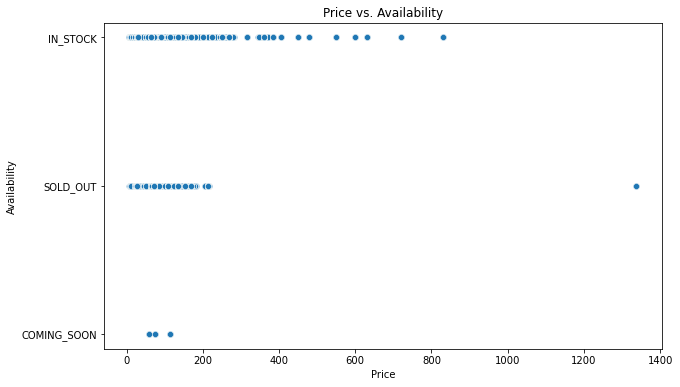

In [39]:
# Scatter Plot for Price vs. Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE_CURRENT', y='AVAILABILITY', data=df)
plt.title('Price vs. Availability')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.show()

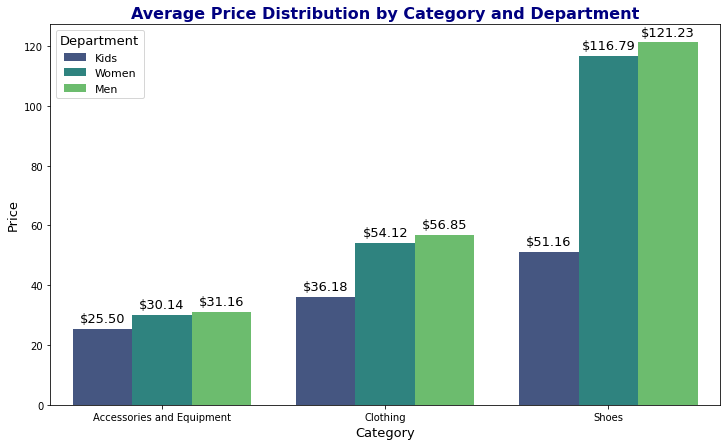

In [40]:
# Box Plot for Price by Category
plt.figure(figsize=(12, 7))

# Grouped bar chart
ax = sns.barplot(x='CATEGORY', y='PRICE_CURRENT', hue='DEPARTMENT', data=df, ci=None, palette='viridis')

plt.title('Average Price Distribution by Category and Department', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Category', fontsize='13')
plt.ylabel('Price', fontsize='13')
plt.xticks(rotation=0)
plt.legend(title='Department', title_fontsize='13', fontsize='11', loc='upper left')  # Adjust the loc parameter

# Add price labels to each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13)

plt.show()

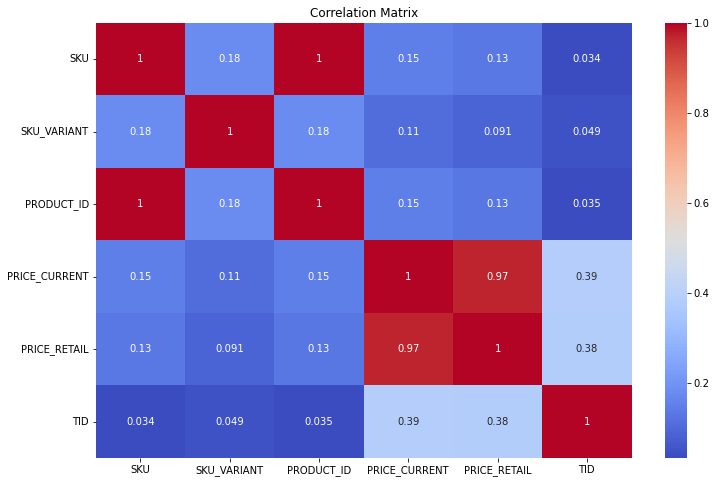

In [41]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## MARKETING STRATEGY : SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

In [46]:
# Load your dataset
dfr = pd.read_csv('review_dataset.csv')

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment and return sentiment label
def analyze_sentiment(text):
    # Handle NaN or null values
    if pd.isnull(text):
        return 'Neutral'
    
    sentiment_scores = sid.polarity_scores(text)
    
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Content' column
dfr['Sentiment'] = dfr['Content'].apply(analyze_sentiment)

# Display the results
print(dfr[['Content', 'Sentiment']])


                                               Content Sentiment
0    Easy website, fast shipping,  wonderful custom...  Positive
1    Hey Merry Christmas Nike!!Delivery scheduled f...  Positive
2    "I read in the New York Times that Nike is fig...  Negative
3    Ordered some shoes the 16th SAME day I ordered...  Negative
4                                                  NaN   Neutral
..                                                 ...       ...
231  I give Nike.com 5 stars because they always sh...  Positive
232                                                NaN   Neutral
233  I bought very expensive running shoes (180€). ...  Negative
234  Ordered a lot through this site and always get...  Positive
235  A large variety of products and lot of great o...  Positive

[236 rows x 2 columns]


In [47]:
# Calculate the overall percentage of each sentiment category
overall_sentiment_percentage = df['Sentiment'].value_counts(normalize=True) * 100

# Display the overall sentiment percentages
print("Overall Sentiment Percentages:")
print(overall_sentiment_percentage)

Overall Sentiment Percentages:
Positive    52.542373
Negative    26.271186
Neutral     21.186441
Name: Sentiment, dtype: float64
